In [ ]:
#Standard importing library: pandas, numpy, matplotlib dan seaborn (plotting)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #Library umum untuk machine learning
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Loading data (biasanya dari google drive. Kali ini datanya di load dari lokal)
df_train = pd.read_csv('train.csv')

In [5]:
#intip data, ada berapa kolom
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#kita intip data paling atas
df_train.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
#Saya ingin tahu persebaran harga rumah di daerah itu secara umum
df_train['SalePrice'].describe()
#ada 1460 rmah yang dijual
# harga rata-rata rumah tersebut adalah 180921
#harga paling murah 34900
#harga palig mahal 755000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

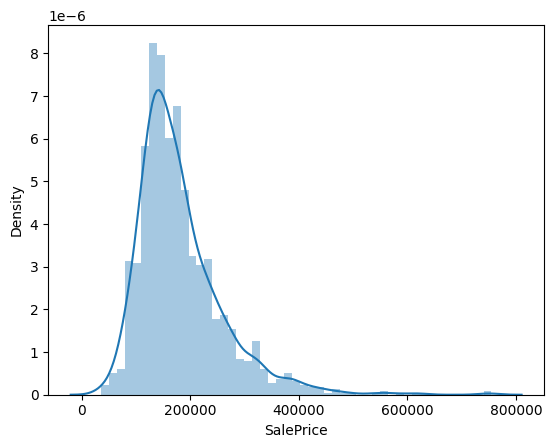

In [8]:
#Sekarang saya ingin plot distribusi harga rumahnya
sns.distplot(df_train['SalePrice']);

In [9]:
#Ada cara untuk mengecek distribusi: Skewness & Kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
#Skewness itu tentang "symmetry" jika symmetris sempurna maka skewness nya nol
#Kurtosis itu tentang "outlier"

Skewness: 1.882876
Kurtosis: 6.536282


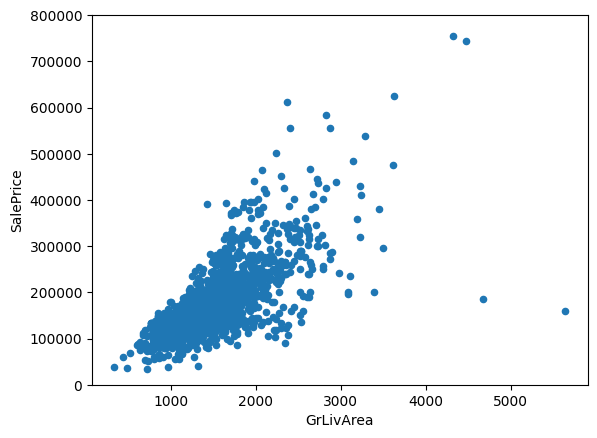

In [10]:
#Kita ingin tahu hubungan antara dua variabel. Yang pertama kita ingin cek adalah hubungan antara "grlivarea" dan harga rumah
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#Ternyata scatter plot nya menunjukan hubungannya linear. Makin besar grlivarea makin mahal harga rumah
# Tapi ada dua outlier, grlivarea nya luas tapi harga rumah nya murah

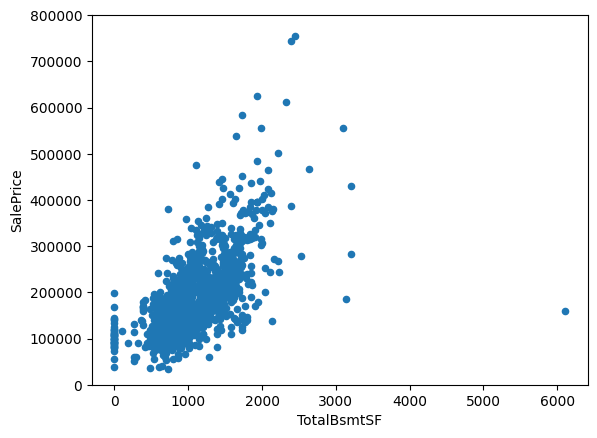

In [11]:
#Sekarang kita cek hubungan antara variable totalbsmtsf dan salesprice
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#Secara umum linear, tapi ada satu yang outlier

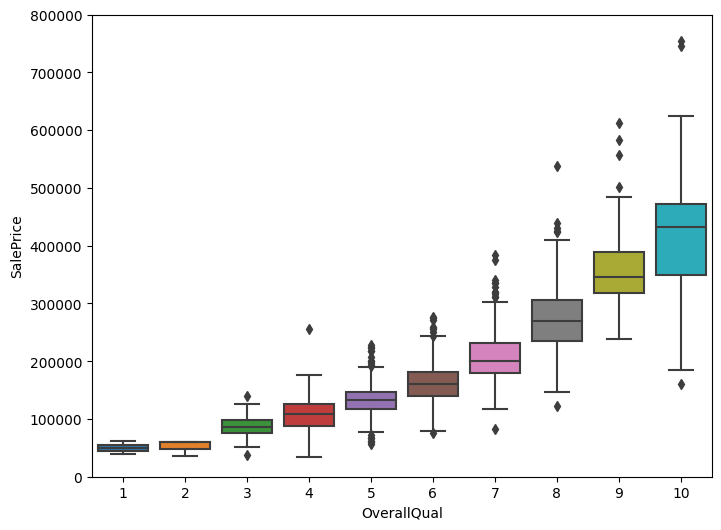

In [12]:
#Biar lebih cantik, kita menggunakan Box plot untuk melihat hubungan antara overall quality atau 'OverallQual' dan harga rumah nya
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
#Hubungannya linear

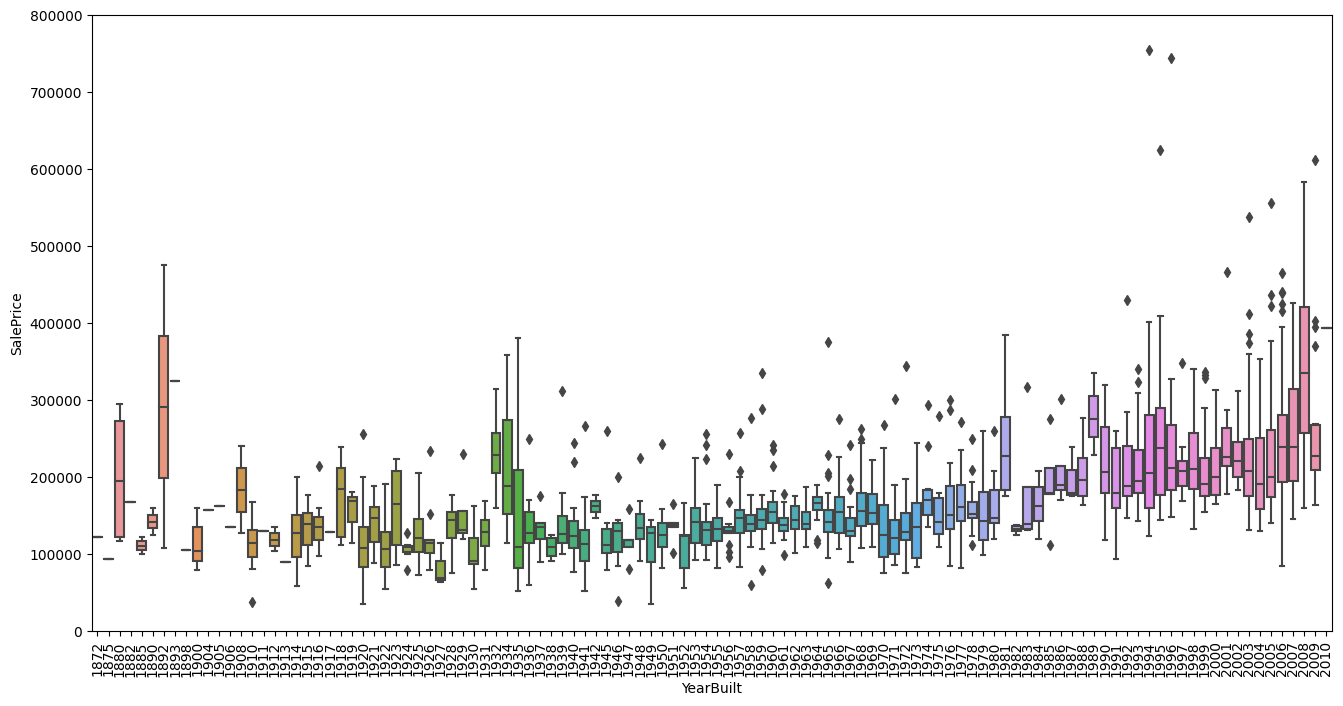

In [13]:
#Saya ingin melihat hubungan antara tahun rumah dibangun dan harga rumah dengan boxplot
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
#Ternyata hubunganya tidak linear. Harga rumah tidak terlalu dipengaruhi tahun rumah dibangun

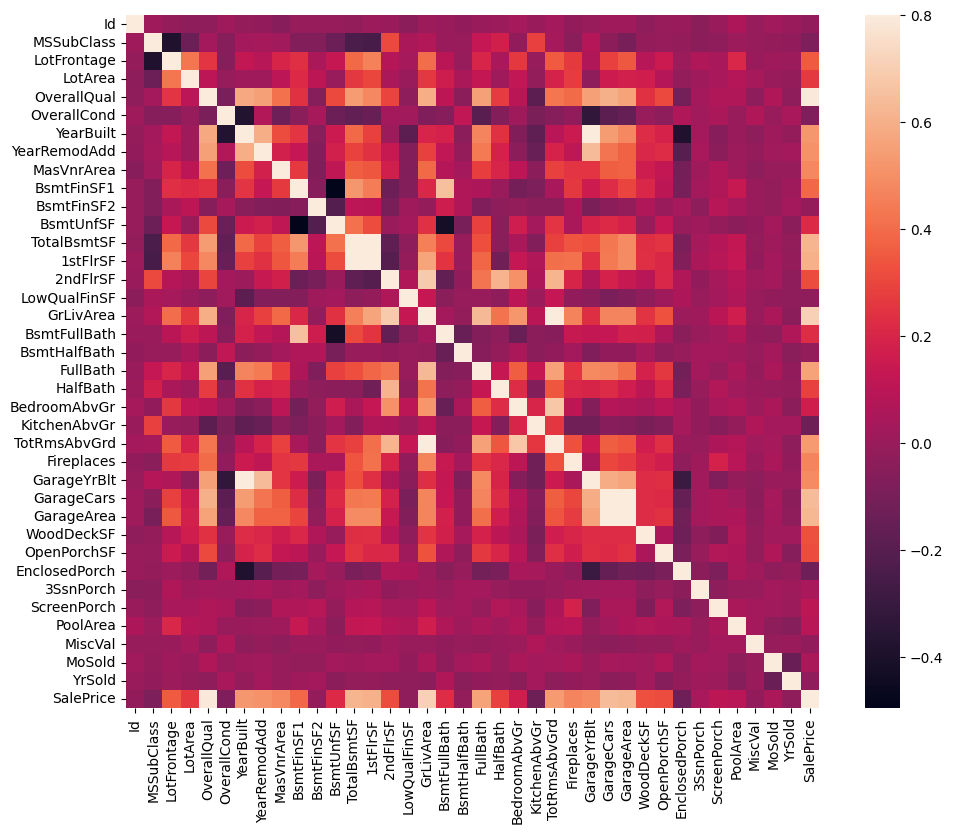

In [14]:
#Dari tadi kita ngecek faktor2 yang mempengaruhi harga rumah satu-satu
#Ada tools yang bernama 'correlation matrix' yang menghitung hubungan antara 2 variable
#Makin besar nilai correlation matrix, makin kuat hubungan antara 2 variable

#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

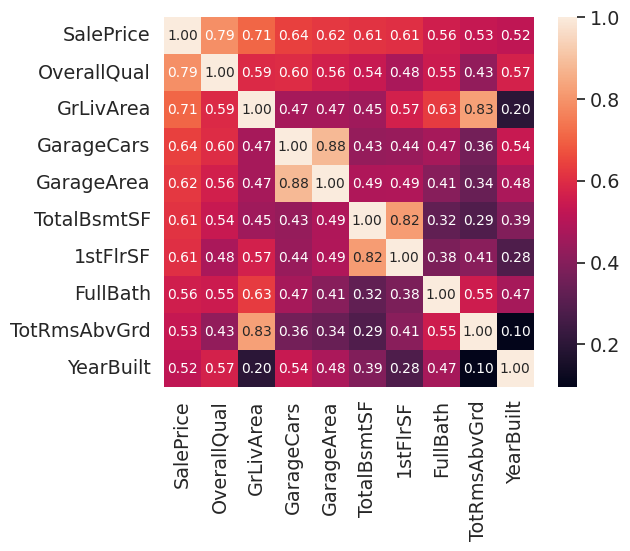

In [15]:
#Lihat warna agak pusing, kita ingin melihat angka. untuk 1o variabel dengan correlation matrix terkuat
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

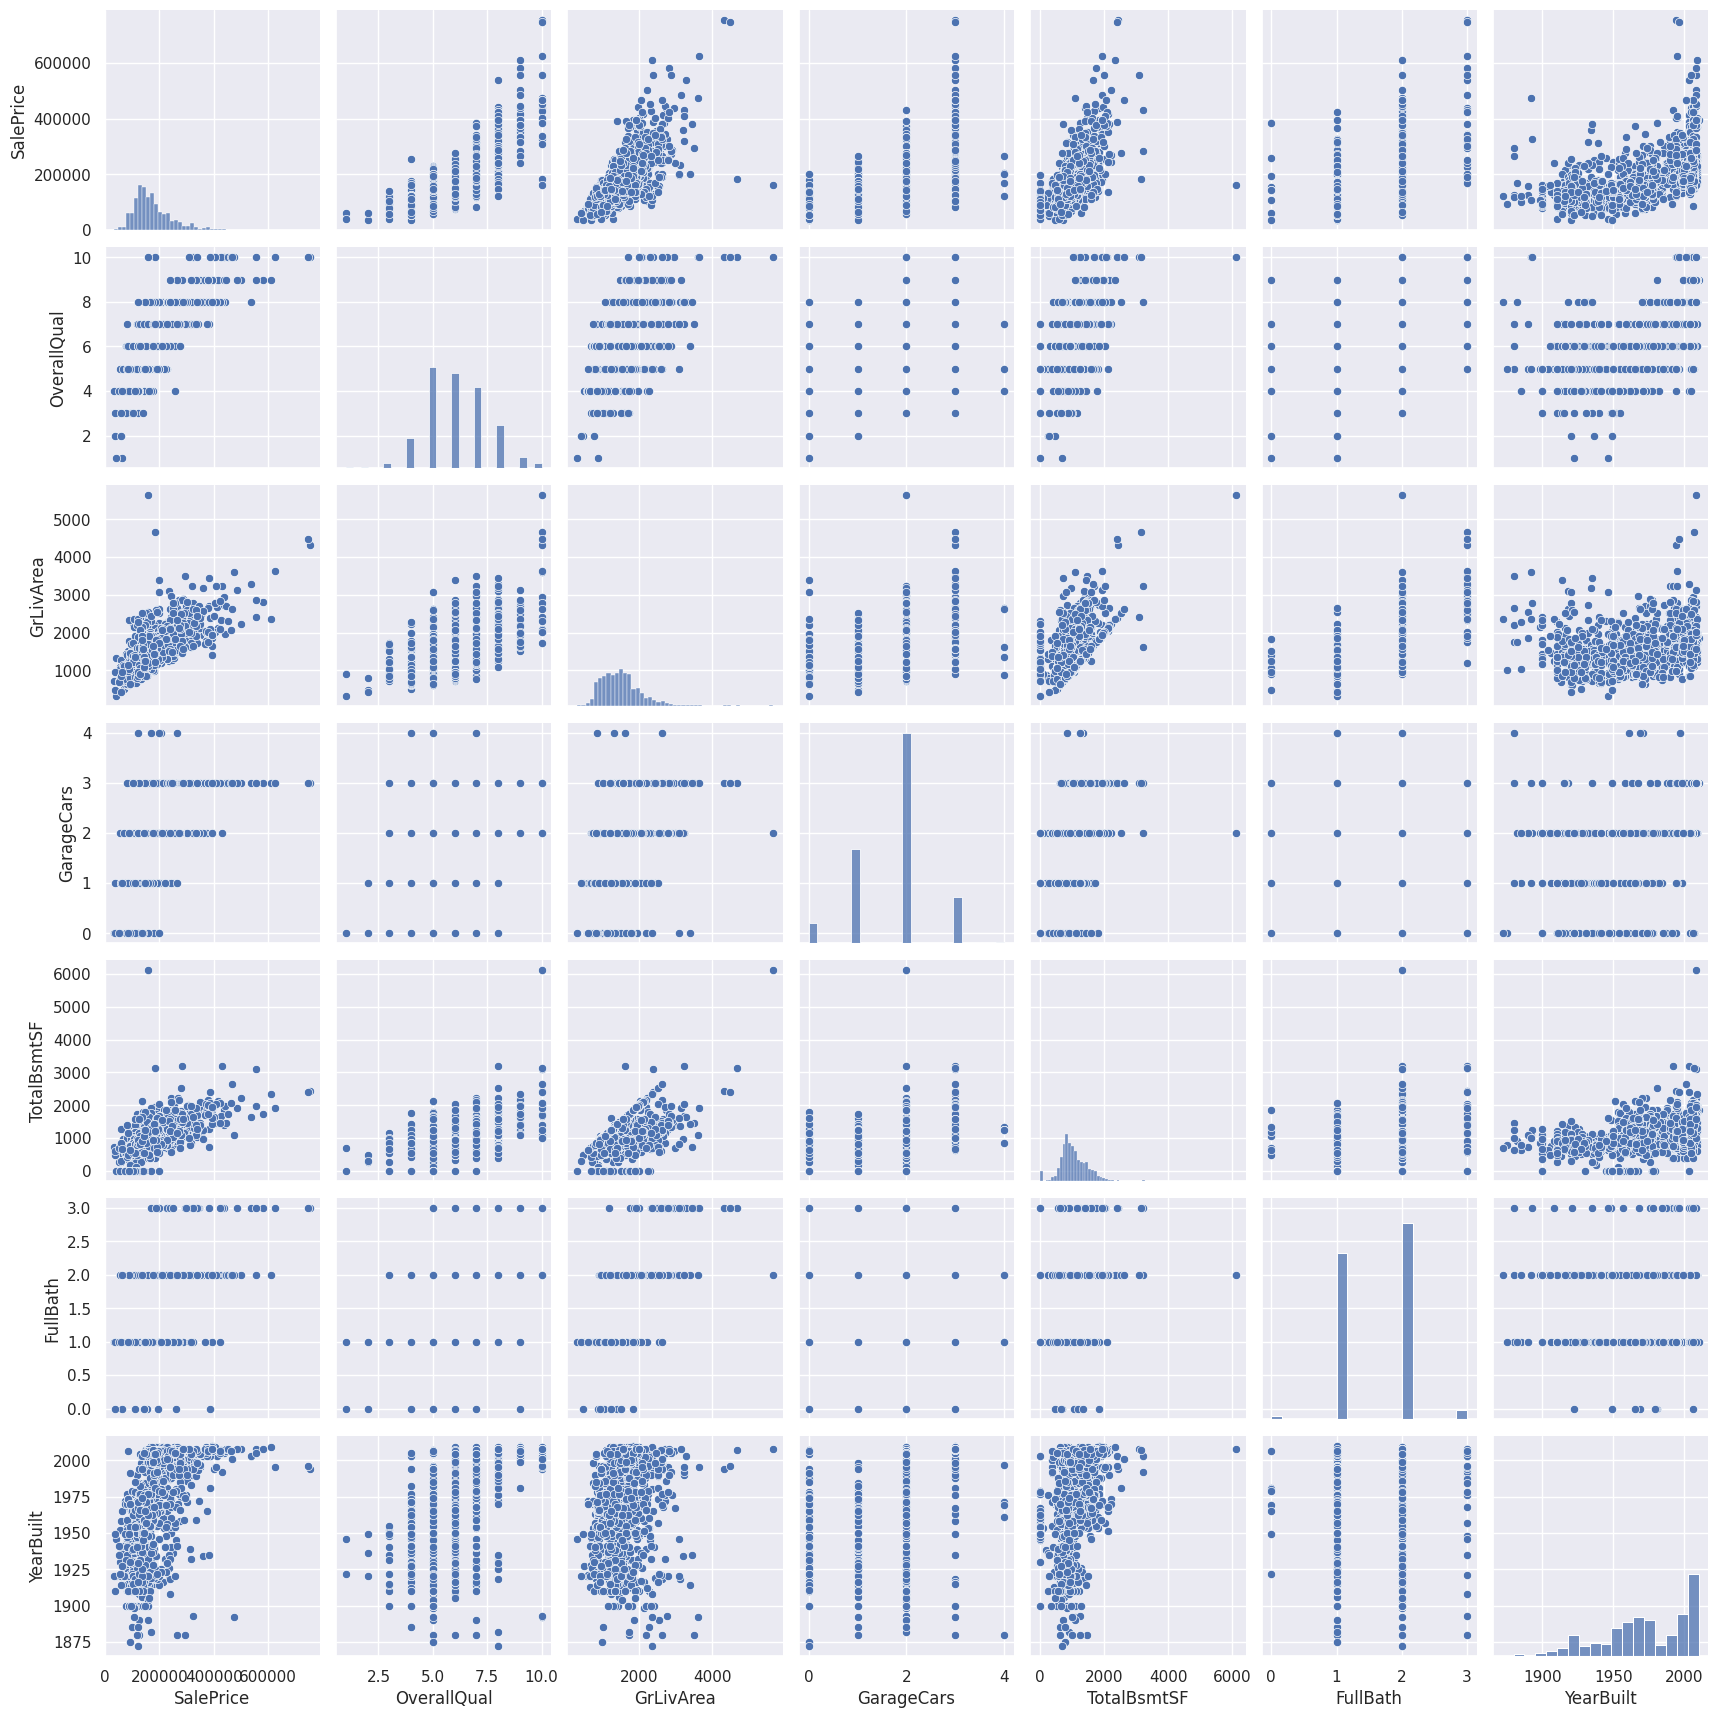

In [16]:
#scatterplot yang lengkap
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

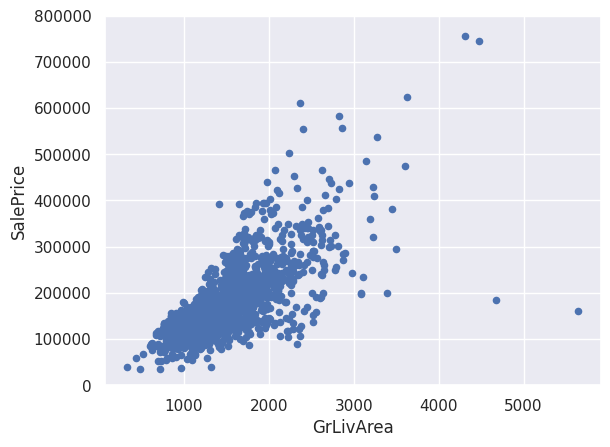

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

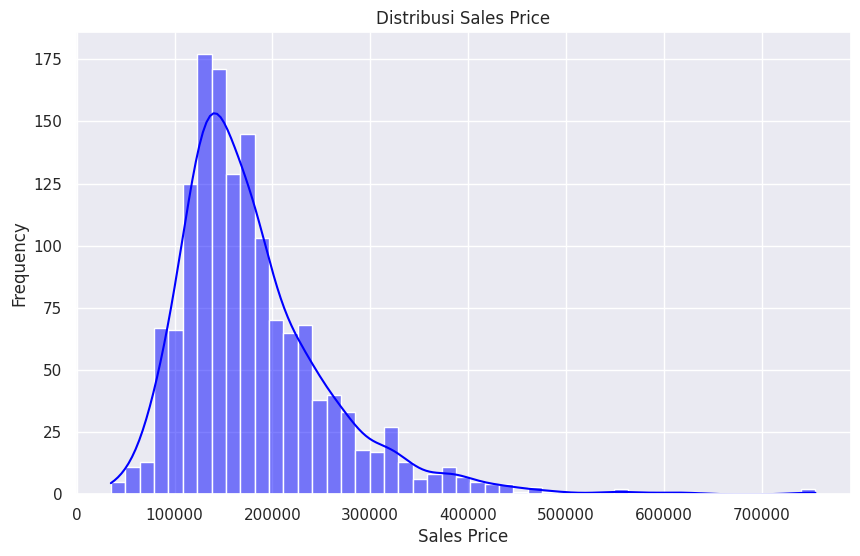

In [19]:
# (a) Distribusi Sales Price
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, color='blue')
plt.title('Distribusi Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

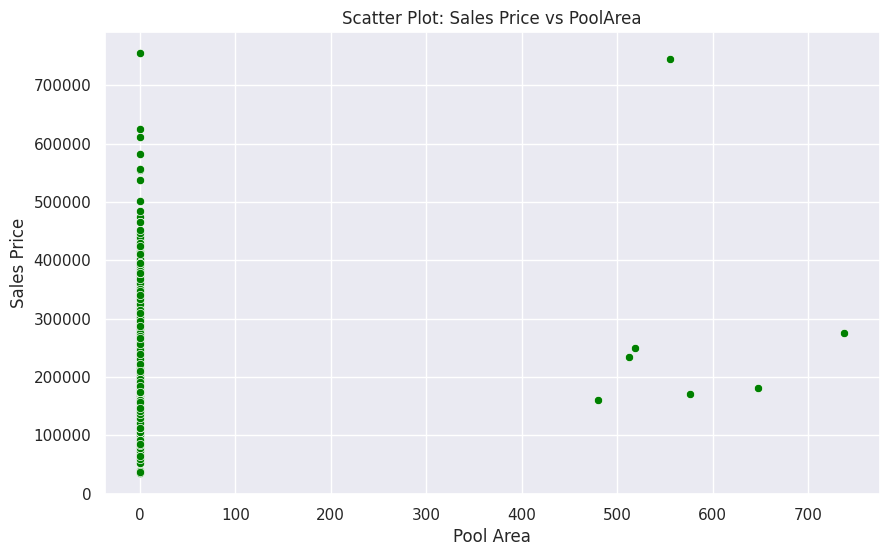

In [20]:
# (b) Scatter plot untuk Sales Price vs PoolArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PoolArea', y='SalePrice', data=df_train, color='green')
plt.title('Scatter Plot: Sales Price vs PoolArea')
plt.xlabel('Pool Area')
plt.ylabel('Sales Price')
plt.show()

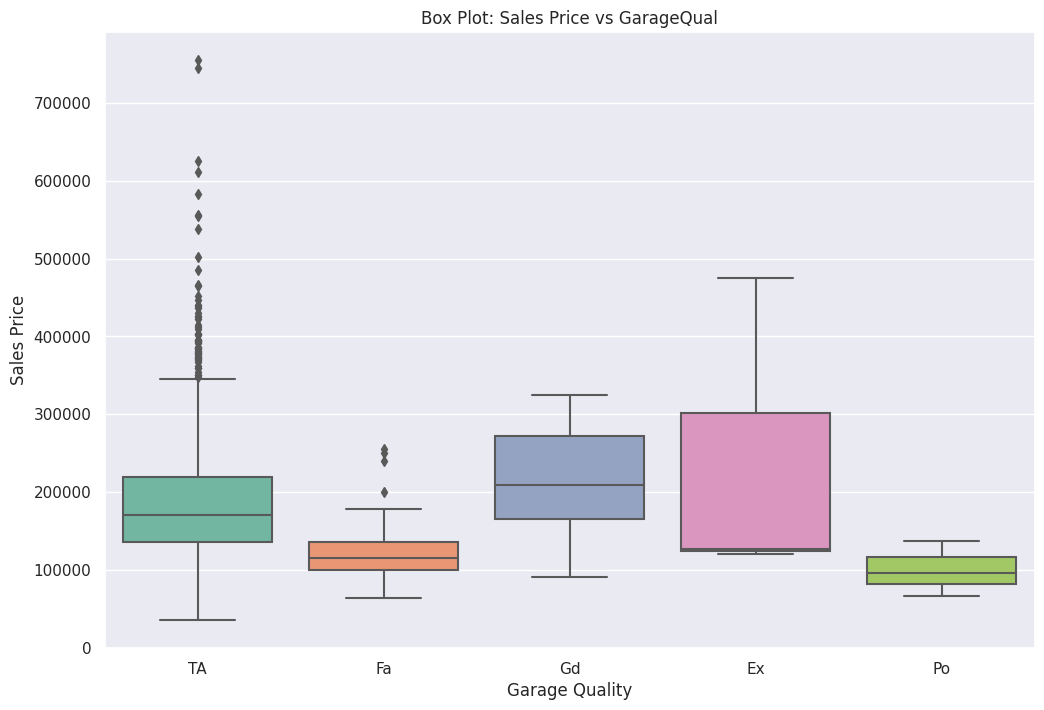

In [21]:
# (c) Box-Plot untuk Sales Price vs GarageQual
plt.figure(figsize=(12, 8))
sns.boxplot(x='GarageQual', y='SalePrice', data=df_train, palette='Set2')
plt.title('Box Plot: Sales Price vs GarageQual')
plt.xlabel('Garage Quality')
plt.ylabel('Sales Price')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

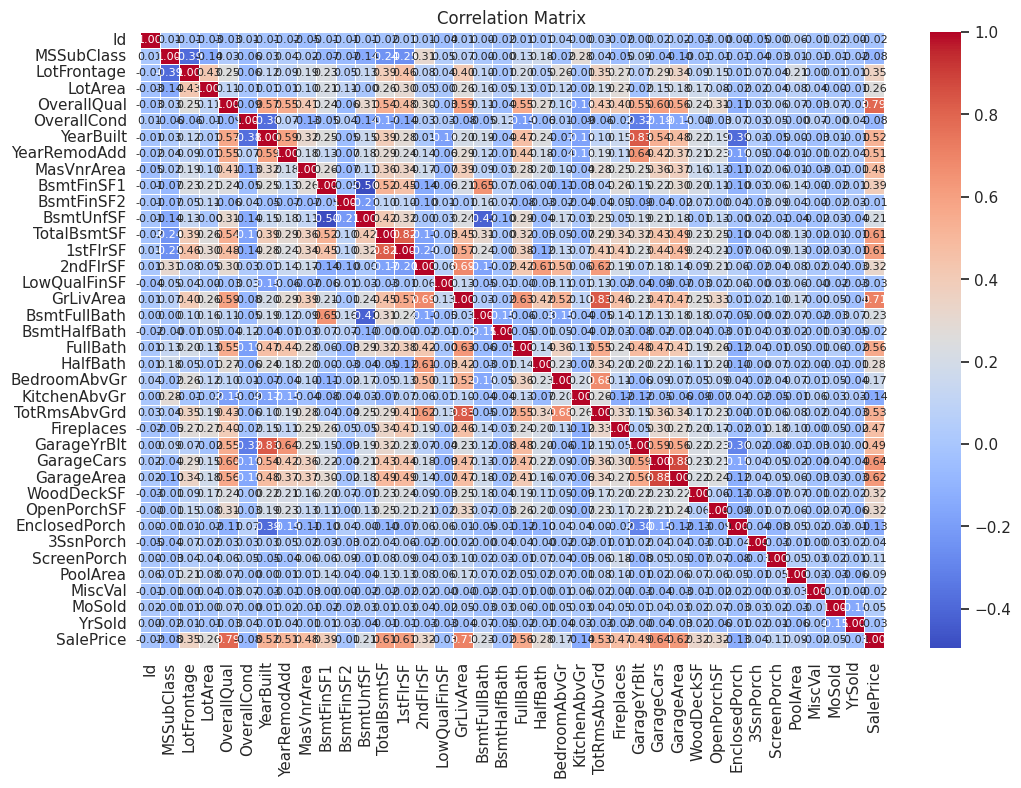

In [26]:
# (d) Correlation matrix
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=.5)
plt.title('Correlation Matrix')

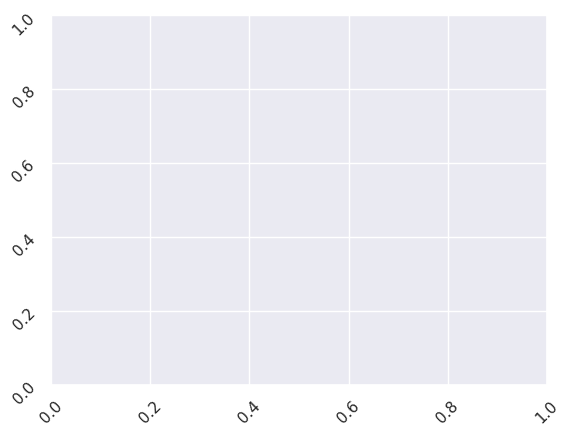

In [27]:
# Memutar teks pada anotasi
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [30]:
# Identifikasi 5 variabel yang paling mempengaruhi harga rumah
top_corr_vars = correlation_matrix['SalePrice'].sort_values(ascending=False).head(5)
print("Top 5 variabel yang paling mempengaruhi harga rumah:")
print(top_corr_vars)

Top 5 variabel yang paling mempengaruhi harga rumah:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
